# Analysis of Data Related to European Football Leagues

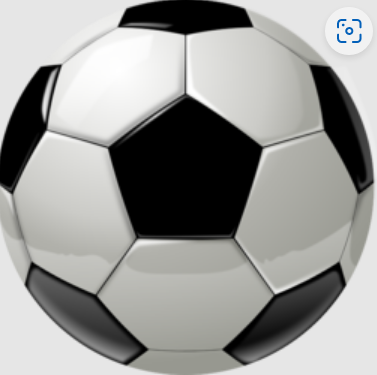

# Introduction

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in number of players and spectators. Football is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to use his hands and may do so only within the penalty area surrounding the goal. The team that scores the most goals wins. The standard length of a game is 90 minutes with a short break, known as "half time," at the 45-minute mark. Only America and Canada call the sport soccer.

European football clubs operate as independent entities that are typically owned by a group of investors or a single owner. They are generally organized into leagues, which are typically organized at the national level. For example, in England, there is the Premier League, in Spain there is La Liga, in Germany there is the Bundesliga, and so on. Within each league, teams compete against each other over the course of a season. At the end of the season, the team with the most points become the champions of the league.

In addition to competing in their national leagues, European football clubs also compete in a variety of other competitions, including international club competitions like the UEFA Champions League and Europa League, as well as domestic cup competitions.

Revenue for professional football clubs in Europe comes from a variety of sources, including ticket sales, merchandising, and broadcast rights. The largest and most successful clubs are often able to generate significant revenue through these channels, which allows them to attract top talent and remain competitive both domestically and internationally.

Football’s governing body is the Fédération Internationale de Football Association (FIFA). 

# Goal

In this report, I analyze the data of the Ultimate 25k+ Matches Football Database (European) from Kaggle to determine if there are ways to gain an advantage in classifying the outcome of a game for purposes of betting.

# Jupyter Notebooks

For this project, I created a separate Jupyter Notebook for the data overview and preprocessing part of this report. Therefore, this project is comprised of two Jupyter Notebooks:
1. Data Overview and Preprocessing
2. The Project
We are currently in the Project Notebook which imports the Data Overview and Preprocessing Notebook in a later section.

# Technical Requirements

1. Perform Data cleaning, exploratory data analysis and feature engineering.
2. Use parameters that gives the most important statistical insights into the data.
3. Create visualizations.
4. Perform statistical inferences and hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
5. Apply linear machine learning models and use them for forecasting. 
6. Use cross-validation, information criteria, and other methods to specify correct modeling.
7. Choose and use appropriate metrics to measure models' performances.
8. Provide clear explanations. 
9. Provide conclusions and suggest how the analysis can be improved.

# Standards

Below is a summary of the standards I followed and my assumptions related to this project. 

>* **Standard 1:** In the matches table, 11 players from each team are listed. I assumed that these 11 players are the only players that participated in the specific game, although this is highly unlikely. 
>* **Standard 2:** I changed all column headers to follow the specific format of capitalizing the first letter of each word and connecting the words without underscore, like this example: "CountryID". 
>* **Standard 3:** If a column contained more than 75% missing data, I eliminated that column from the table.
>* **Standard 4:** To keep the data as conscise as possible, I dropped any column that I deemed unnecessary or useful to achieve the goals of this report. 
>* **Standard 5:** For a good portion of this report, I concentrated on comparing matches played at home and away from home.
>* **Standard 6:** I decided to create a model that captures as many wins as possible. I am not interested in losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
>* **Standard 7:** I ignored the data related to the position of players on the field. I did not think I had enough domain knowledge to incorporate it. I also did not have a way to include this information in the dataframe for creating machine learning models.   
>* **Standard 8:** I eliminated columns with categorical data such as, "low," "medium," and "high," when the data was also available in numerical format in another column.     

# Biases

Below is the biases I identified while creating this report.

>* **Bias 1:** Clear data about each player in the team is not part of this data set. Some of the data seems made up and unreliable. 
>* **Bias 2:** Clear data about each team is not part of this data set. Some of the data seems made up and unreliable.

# Domain Knowledge

I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import eli5 as eli
import warnings
import math
import sqlite3
import pydot

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from eli5.sklearn import PermutationImportance
from scipy import stats
from xml.etree.ElementTree import fromstring, ElementTree
from scipy.stats import ttest_rel
from scipy.stats import randint

# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Data Overview and Preprocessing

I performed this section of the project in a second Jupyter Notebook.

In [ ]:
%run C:\Users\Space\Documents\py\Projects\TuringCollege\Football\FootballDataCleaning.ipynb

### Section Summary
> * The data overview and preprocessing were completed in a second Jupyter Notebook.
> * The results of the Data Overview and Preprocessing Notebook are 3 dataframes, players, teams and matches. I utilized these dataframes for the remainder of this report.

# Exploratory Data Analysis

In this section, I will use the players and teams dataframe to highlight important information in this data.

## Loading the Players Dataframe

In [5]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index_col=0
)

In [6]:
players.head()

,PlayerID,PlayerName,Birthday,Height,Weight,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,505942,Aaron Appindangoye,1992,182.88,187,2007,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
1,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
2,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
4,505942,Aaron Appindangoye,1992,182.88,187,2016,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PlayerID          180354 non-null  int64  
 1   PlayerName        180354 non-null  object 
 2   Birthday          180354 non-null  int64  
 3   Height            180354 non-null  float64
 4   Weight            180354 non-null  int64  
 5   Date              180354 non-null  int64  
 6   PreferredFoot     180354 non-null  object 
 7   AttackWorkRate    180354 non-null  object 
 8   DefenceWorkRate   180354 non-null  object 
 9   OverallRating     180354 non-null  float64
 10  Potential         180354 non-null  float64
 11  Crossing          180354 non-null  float64
 12  Finishing         180354 non-null  float64
 13  HeadingAccuracy   180354 non-null  float64
 14  ShortPassing      180354 non-null  float64
 15  Volleys           180354 non-null  float64
 16  Dribbling         18

In [8]:
players.describe()

,PlayerID,Birthday,Height,Weight,Date,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000
mean,137653.145514,1986.915583,181.877895,168.774593,2012.587118,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,53.001408,49.392783,57.084578,63.453846,67.709405,68.101628,65.995082,66.148297,65.190082,61.866474,66.977333,67.053401,67.432477,53.387560,60.946217,51.897374,55.730730,57.868176,54.933448,46.757433,50.354065,48.029342
std,137599.735284,4.776122,6.398588,15.098388,2.569413,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,18.245476,17.820262,14.412035,15.187692,13.011580,12.585984,12.963670,9.145011,13.076192,16.129537,11.017828,13.200669,12.085131,18.370204,16.101618,19.483338,18.458218,15.152408,15.556645,21.226730,21.496289,21.592830
min,2625.000000,1969.000000,157.480000,117.000000,2007.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,35451.000000,1984.000000,177.800000,159.000000,2011.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000
50%,80291.000000,1987.000000,182.880000,168.000000,2013.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000
75%,192841.000000,1991.000000,185.420000,179.000000,2015.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000
max,750584.000000,1999.000000,208.280000,243.000000,2016.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000


## Loading the Teams Dataframe

In [6]:
teams = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index_col=0,
)

In [10]:
teams.head()

,TeamID,TeamLongName,TeamShortName,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9987,KRC Genk,GEN,2010,45,45,50,35,60,70,65,70
1,9987,KRC Genk,GEN,2011,66,52,65,66,51,48,47,54
2,9987,KRC Genk,GEN,2012,53,55,55,48,56,47,45,55
3,9987,KRC Genk,GEN,2013,58,38,67,48,56,47,45,55
4,9987,KRC Genk,GEN,2014,58,38,67,48,56,47,45,55


In [11]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TeamID                  1458 non-null   int64 
 1   TeamLongName            1458 non-null   object
 2   TeamShortName           1458 non-null   object
 3   Date                    1458 non-null   int64 
 4   BuildUpPlaySpeed        1458 non-null   int64 
 5   BuildUpPlayPassing      1458 non-null   int64 
 6   ChanceCreationPassing   1458 non-null   int64 
 7   ChanceCreationCrossing  1458 non-null   int64 
 8   ChanceCreationShooting  1458 non-null   int64 
 9   DefencePressure         1458 non-null   int64 
 10  DefenceAggression       1458 non-null   int64 
 11  DefenceTeamWidth        1458 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 148.1+ KB


In [12]:
teams.describe()

,TeamID,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,9995.727023,2012.506859,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,13264.869900,1.709201,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1601.000000,2010.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,8457.750000,2011.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,8674.000000,2013.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,9904.000000,2014.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,274581.000000,2015.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


## Loading the Matches Dataframe

In [7]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index_col=0,
)

In [14]:
matches.head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,5,72.0,72.0,72.0,74.0,70.0,71.0,75.0,68.0,72.0,78.0,74.0,72.0,72.0,68.0,72.0,68.0,69.0,70.0,70.0,70.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,1
1,2010,1,Belgium Jupiler League,838635,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,2,2,4,72.0,74.0,70.0,71.0,60.0,72.0,69.0,68.0,68.0,72.0,74.0,65.0,72.0,68.0,67.0,72.0,68.0,70.0,72.0,72.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0
2,2010,1,Belgium Jupiler League,838544,9986,Sporting Charleroi,CHA,8342,Club Brugge KV,CLB,0,5,5,55.0,63.0,62.0,64.0,64.0,63.0,66.0,62.0,61.0,72.0,63.0,65.0,72.0,68.0,70.0,72.0,72.0,64.0,72.0,72.0,70.0,72.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,-1
3,2010,1,Belgium Jupiler League,838714,8203,KV Mechelen,MEC,8342,Club Brugge KV,CLB,0,1,1,70.0,64.0,63.0,66.0,65.0,66.0,65.0,66.0,63.0,66.0,66.0,72.0,72.0,68.0,67.0,70.0,68.0,72.0,70.0,72.0,72.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,-1
4,2010,1,Belgium Jupiler League,665737,9997,Sint-Truidense VV,STT,8342,Club Brugge KV,CLB,1,1,2,68.0,70.0,65.0,64.0,65.0,66.0,63.0,67.0,64.0,62.0,73.0,72.0,72.0,68.0,70.0,70.0,68.0,69.0,70.0,72.0,71.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,0


In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18243 entries, 0 to 18242
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18243 non-null  int64  
 1   LeagueID                    18243 non-null  int64  
 2   LeagueName                  18243 non-null  object 
 3   MatchID                     18243 non-null  int64  
 4   HomeTeamID                  18243 non-null  int64  
 5   HomeTeamLongName            18243 non-null  object 
 6   HomeTeamShortName           18243 non-null  object 
 7   AwayTeamID                  18243 non-null  int64  
 8   AwayTeamLongName            18243 non-null  object 
 9   AwayTeamShortName           18243 non-null  object 
 10  HomeGoal                    18243 non-null  int64  
 11  AwayGoal                    18243 non-null  int64  
 12  TotalGoals                  18243 non-null  int64  
 13  HomePlayer1                 182

In [16]:
df.describe()

,Date,LeagueID,MatchID,HomeTeamID,AwayTeamID,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
count,18243.000000,18243.000000,1.824300e+04,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000
mean,2012.491860,11644.669188,1.278929e+06,9642.721976,9628.273639,1.549307,1.160719,2.710026,72.921011,69.924245,71.579400,71.516527,69.820041,71.407773,71.494381,71.651592,72.172724,72.496684,72.691169,72.923642,69.833909,71.572384,71.465384,69.811325,71.288165,71.414625,71.561805,72.055035,72.420216,72.644192,3.277367,2.867127,3.710574,2.887464,7.018418,7.196623,1.994135,2.214055,10.806063,8.228087,3.164666,2.734583,52.674944,47.862029,52.477224,54.076358,54.258675,46.482596,49.598038,52.275887,52.661788,47.866634,52.505564,54.066875,54.246177,46.486269,49.571452,52.292715,0.172505
std,1.721599,7518.931071,3.985441e+05,11064.968462,10844.519892,1.300873,1.142005,1.676829,6.822861,6.136049,6.208029,6.324190,6.031412,6.383951,6.386864,6.348163,6.621921,6.652232,6.585060,6.844261,6.196632,6.207532,6.345941,5.998550,6.372359,6.364757,6.338110,6.619984,6.652356,6.545144,3.008672,2.488521,2.956653,2.432782,5.392966,5.595430,1.096295,1.170554,8.692022,7.042099,2.826036,2.298744,11.897339,11.144100,10.497135,11.191892,10.599863,10.329139,9.998491,9.552154,11.875227,11.134900,10.521294,11.186052,10.609745,10.345388,10.008251,9.556229,0.846519
min,2010.000000,1.000000,6.541530e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,46.000000,46.000000,50.000000,46.000000,45.000000,44.000000,41.000000,44.000000,44.000000,45.000000,45.000000,46.000000,45.000000,45.000000,44.000000,45.000000,41.000000,41.000000,44.000000,41.000000,45.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,-1.000000
25%,2011.000000,4769.000000,8.884955e+05,8485.000000,8485.000000,1.000000,0.000000,2.000000,68.000000,66.000000,67.000000,67.000000,66.000000,67.000000,67.000000,67.000000,68.000000,68.000000,68.000000,68.000000,66.000000,67.000000,67.000000,66.000000,67.000000,67.000000,67.000000,68.000000,68.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,45.000000,39.000000,47.000000,48.000000,49.000000,39.000000,44.000000,48.000000,45.000000,39.000000,47.000000,48.000000,48.000000,39.000000,44.000000,48.000000,-1.000000
50%,2012.000000,10257.000000,1.22919

# Description of Player and Team Attributes

Here is a description of each of the attributes used for the players and the teams in the dataframes.

## Player Attributes

An attribute is an ability that a player possesses. Most of the attributes are rated in the range of 0 to 99. The average rating of these attributes is reflected in the overall_rating field. The higher the value of these attributes, the better the player's ability. We can classify the value of an attribute with the following quality labels. Some of the attributes have a categorical label such as, "High," "Medium," or "low."<BR>

- **Excellent:** 90 - 99
- **Very Good:** 80 - 89
- **Good:** 70 - 79 
- **Fair:** 50 - 69 
- **Poor:** 40 - 49 
- **Very Poor:** 0 - 39
    
**OverallRating:** Overall rating of the player's skills based on the average of the other attributes. <BR>
**Potential:** Estimate of the maximum overall rating of a player in his professional career.<BR>
**PreferredFoot:** Which leg the player tends to play with.<BR>
**AttackWorkRate:** Level of involvement or participation of a player in attacking movements. These attributes can have the values high, medium and low.<BR> 
**DefenseWorkRate:** Level of involvement or participation of a player in defensive movements. These attributes can have the values high, medium and low.   
**Card:** Penalty cards are used by referees to indicate that a player has committed a foul. <BR>
**Crossing:** Quality and precision of a player to make a pass toward the center of the field, near the opponent's goal. <BR>
**Finishing:** Ability to score a goal.<BR> 
**HeadingAccuracy:** Accuracy in passing or clearing the ball using their head.<BR> 
**ShortPassing:** Ability to make short passes <BR> 
**Volleys:** Ability to take shots or passes while the ball is in the air. <BR> 
**Dribbling:** Ability to maintain possession of the ball against an opponent. <BR> 
**Curve:** Ability to perform passes or shots with a curve effect.<BR> 
**FreeKicAccuracy:** Accuracy or skill of the player in free kicks.<BR> 
**LongPassing:** Ability to make long passes<BR> 
**BallControl:** Level of control of the player over the ball.<BR> 
**Acceleration:** Ability to increase the speed of the player on the field.<BR> 
**SprintSpeed:** Speed of the player<BR> 
**Agility:** How fast a player can handle the ball.<BR> 
**Reactions:** Response time of the player to events that happen around him.<BR> 
**Balance:** Balance level.<BR> 
**ShotPower:** Power of a player's shots.<BR> 
**Jumping:** Quality of jumping.<BR> 
**Stamina:** Ability to maintain physical effort.<BR> 
**Strength:** Physical strength of the player.<BR> 
**LongShots:** Ability to take long shots.<BR> 
**Aggression:** Frequency of pushing, pulling and blocking members of the opposing team.<BR> 
**Interceptions:** Ability to intercept the ball during passes from the opposing team.<BR> 
**Positioning:** Ability to take the correct position on the field.<BR> 
**Vision:** Mental ability to remember the positions of his teammates.<BR> 
**Penalties:** Accuracy to make penalty shots.<BR> 
**Marking:** Ability to defend against a play by the opposing team.<BR> 
**StandingTackle:** Ability to make standing tackles -- extend the leg to move the ball away from the opponent.<BR> 
**SlidingTackle:** Ability to make sliding tackles -- extend the leg to move the ball away from the opponent.  

## Team Attributes

**BuildUpPlaySpeed:** Speed at which the team can stage an attack. <BR>
**BuildUpPlayPassing:** Ability to pass the ball to team members.<BR>
**ChanceCreationPassing:** Passes made by players that lead to a scoring opportunity for their team.<BR>
**ChanceCreationCrossing:** Passes made by players toward the center of the pitch, to create a goal-scoring opportunity for their team.<BR> 
**ChanceCreationShooting:** Ability of a player to create a scoring opportunity for their team by taking a shot on goal or setting up a teammate for a shot.<BR>     
**DefencePressure:** Putting pressure on the opposing team's players when they have the ball.<BR>
**DefenceAggression:** A tactical approach where the defenders of a team play in a highly assertive manner to win back possession of the ball or stop the opposition's attack. <BR>
**DefenceTeamWidth:** The positioning of the defensive players in a way that maximizes the width of the team's defensive shape.<BR> 

# Total Number of Players

Information on approximately 10,000 players is included in this dataset.

In [11]:
players.PlayerID.nunique()

10410

# Total Number of Teams

Information on approximately 300 teams is included in this dataset.

In [12]:
teams.TeamID.nunique()

288

# Leagues by Total Number of Wins

The visualization below depicts leagues by the total number of wins.

In [13]:
league_most_wins = (
    matches.groupby("LeagueName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)

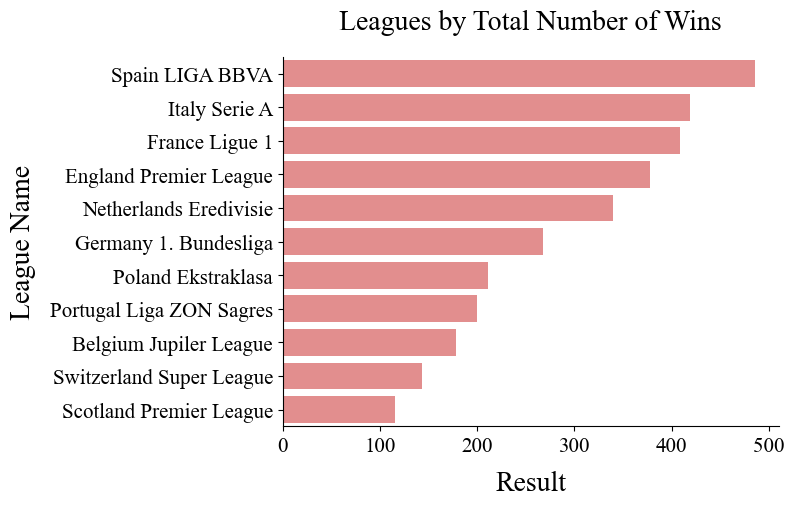

In [14]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="LeagueName", data=league_most_wins, color=color_4)

ax.set_ylabel("League Name")
plt.title("Leagues by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * League with the highest number of wins: Spain LIGA BBVA
> * League with the lowest number of wins: Scotland Premier League

# Top 10 Teams by Total Number of Wins

The visualization below depicts the top 10 teams with most wins.

In [15]:
team_most_wins = (
    matches.groupby("HomeTeamLongName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)
team_most_wins = team_most_wins.head(10)

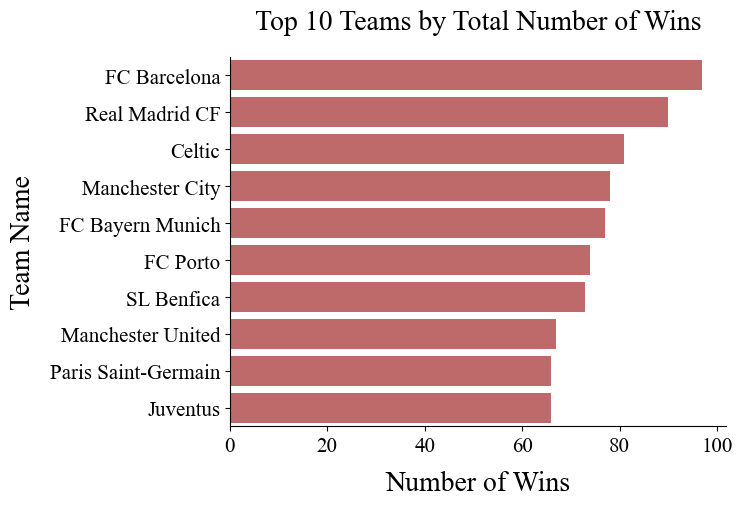

In [16]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="HomeTeamLongName", data=team_most_wins, color=color_7)

ax.set_ylabel("Team Name")
ax.set_xlabel ("Number of Wins")
plt.title("Top 10 Teams by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * The top ten teams ordered by the number of wins are shown above.

# Player Birth Years

The visualization below indicates the distribution of ages of the players.

In [17]:
birthdays = players.groupby("Birthday")["PlayerID"].nunique()
birthdays = birthdays.to_frame().reset_index().rename(columns={"PlayerID": "Count"})

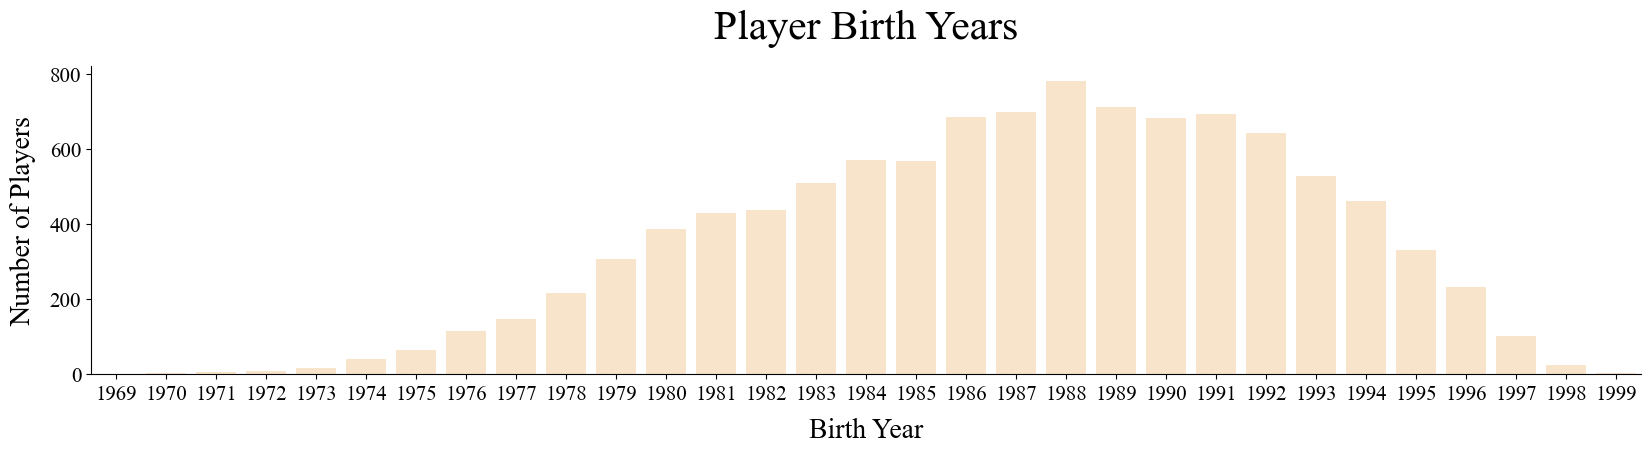

In [18]:
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(data=birthdays, x="Birthday", y="Count", color=color_1)

ax.set_xlabel("Birth Year")
ax.set_ylabel("Number of Players")
plt.title("Player Birth Years", fontsize=size * 1.5)
sns.despine()

### Section Summary
> * From the birth year of the players and the dates this data was collected, it seems that most players were in their twenties at the time of accumulation of this data.

# Height and Weight of the Players

The visualization below shows the Height and weight of the players.

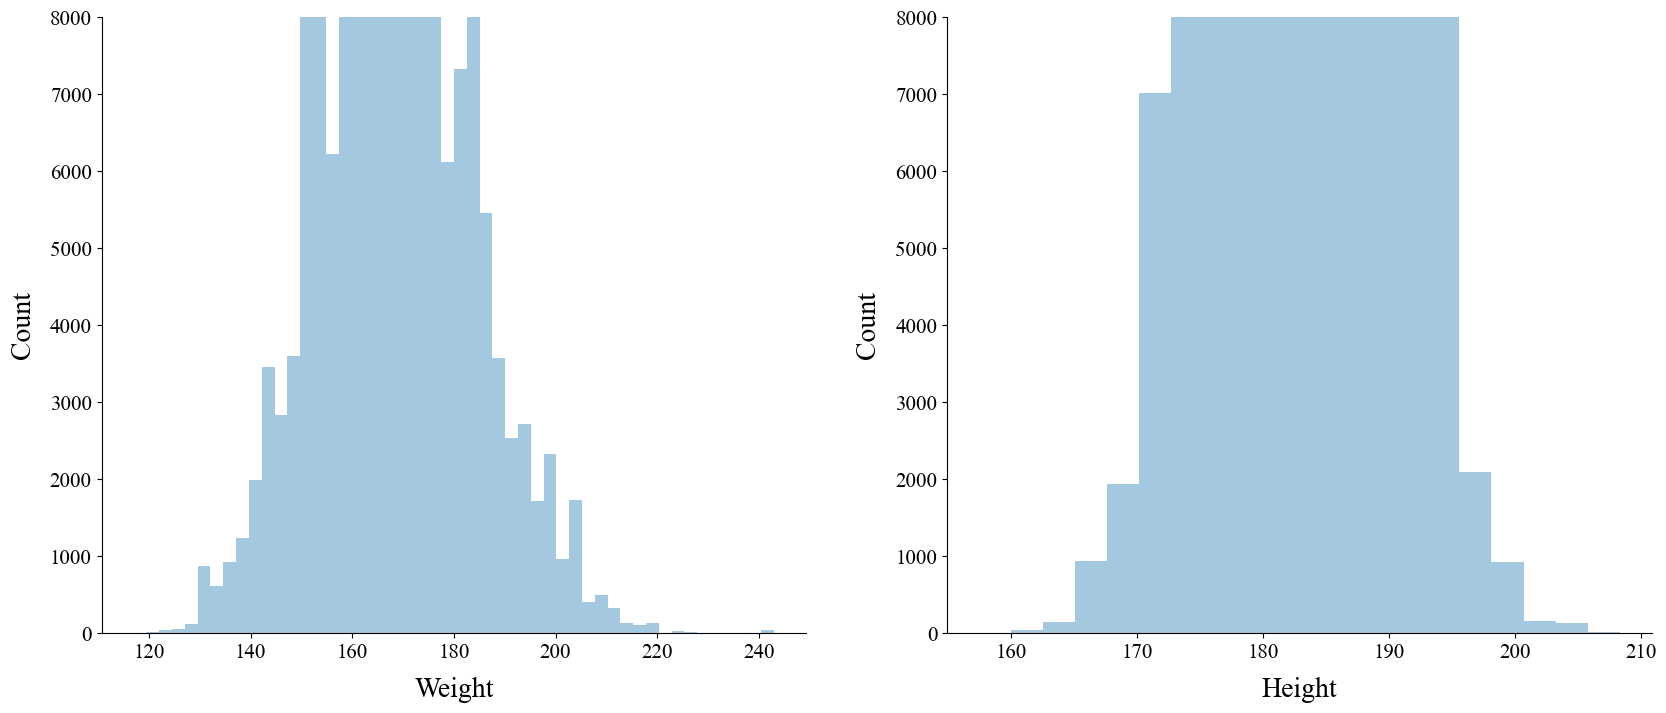

In [19]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.distplot(players["Weight"], kde=False, ax=axes[0])
axes[0].set(xlabel="Weight", ylabel="Count", ylim=(0, 8000))

sns.distplot(players["Height"], kde=False, ax=axes[1], bins=20)
axes[1].set(xlabel="Height", ylabel="Count", ylim=(0, 8000))

sns.despine()

### Section Summary
> * The units for weight and height are not indicated in this data. I assume that height is measured in centimeters. Weight seems to be measured in pound (lb), which is equivalent to 0.45 kilograms.
> * From these visualizations, we can surmise that the weight of most players is between 150 and 190. 
> * From these visualizations, we can surmise that the height of most players is between 175 and 195. 

# Total Number of Goals at Matches Played at Home and Away from Home

The visualization below shows the total number of goals made in games played at home in comparison to those played away from home.

In [20]:
goals = matches[["HomeGoal", "AwayGoal"]]
goals = goals.sum(numeric_only=True)
goals = goals.to_frame().reset_index().rename(columns={"index": "Goals", 0: "Count"})

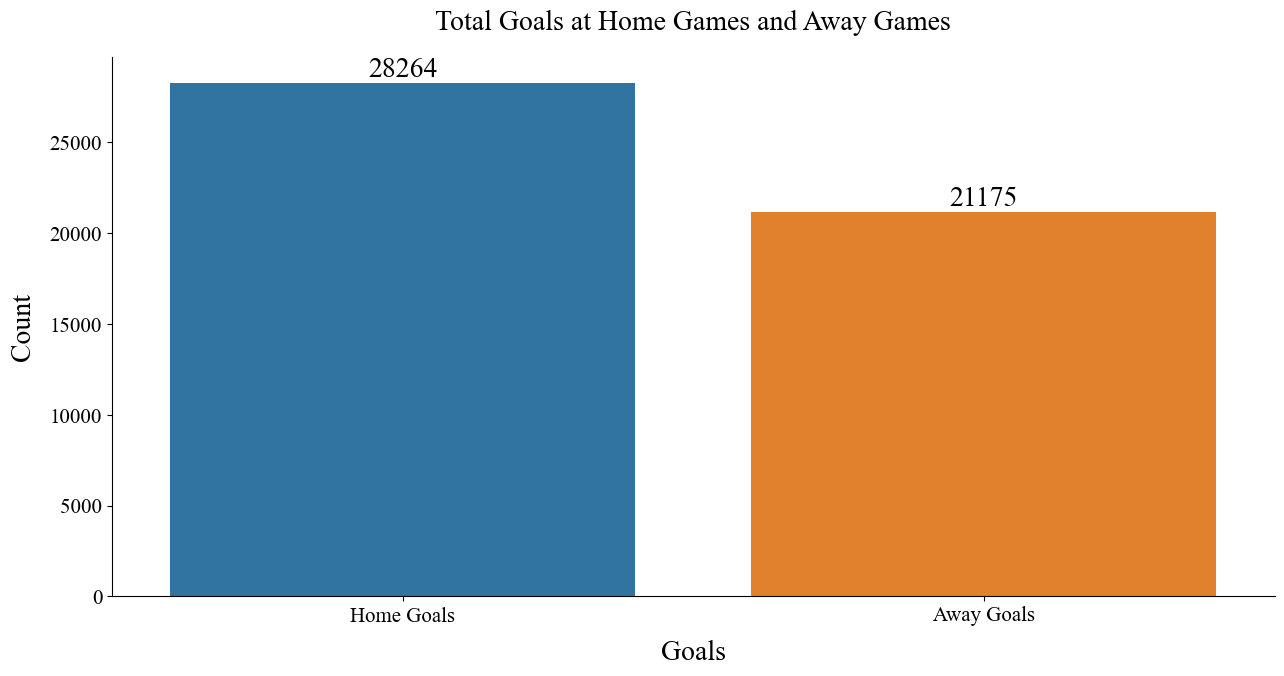

In [21]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Goals", y="Count", data=goals, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Goals", "Away Goals"])
plt.title("Total Goals at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More goals were made by the teams when they played at home.
> * If we had to guess which team will win a match, a safe guess would be to pick the team playing at home.

# Hypothesis Test: Mean Number of Goals Made in Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of goals made for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of goals made for matches played at home is significantly different than the mean number of goals made for matches played away from home. 

## Two-Sample T-Test

In [31]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)
    
    print("The p-value is: ", result.pvalue)
    
    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [32]:
home_goal = matches["HomeGoal"]
away_goal = matches["AwayGoal"]

## Numpy Variance Test

In [33]:
var_home_defensive_pressure = np.var(home_goal)
var_away_defensive_pressure = np.var(away_goal)

if var_home_defensive_pressure == var_away_defensive_pressure:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [34]:
pvalue = two_sample_t_test(home_goal, away_goal, variance)

The variance of the samples are different.
The p-value is:  2.0494059052383298e-199
Null hypothesis is rejected.


### Section Summary
> * I conducted a two-sample t-test to test this hypothesis, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * The p-value obtained is almost zero, so it is much smaller than the significance level of 0.05. 
> * The NULL HYPOTHESIS was REJECTED, indicating that there is a statistically significant difference between the mean number of goals made at home games and the mean number of goals made at away games. 

# Total Goals by Season at Home Games and Away Games

The visualization below depicts the total number of goals made in each season at games played at home and away from home.

In [35]:
goals_season = matches[["Date", "HomeGoal", "AwayGoal"]].groupby(by="Date").sum()
goals_season = goals_season.rename(
    columns={"HomeGoal": "Home Goals", "AwayGoal": "Away Goals"}
)

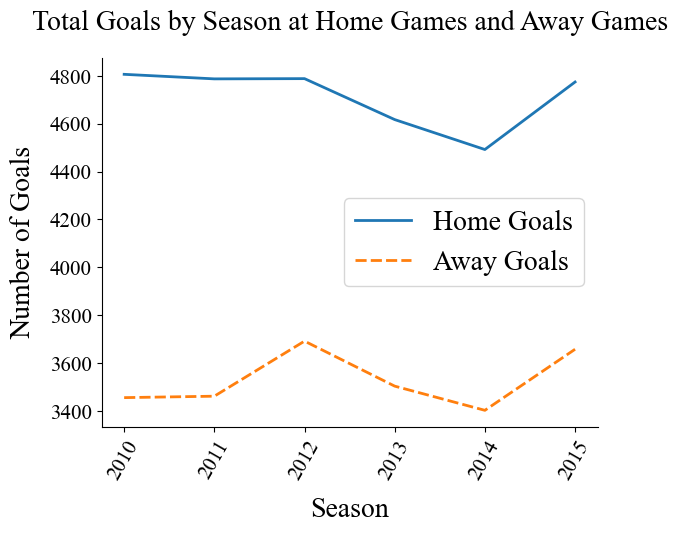

In [27]:
plt.rcParams.update(params)

sns.lineplot(data=goals_season)
plt.xticks(rotation=60)

labels = ["Away Goals", "Home Goals"]
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title("Total Goals by Season at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * In every season, the number of goals made by home teams were higher than by away teams.

# Preferred Foot of Players and Their Overall Rating

The visualization below shows the overall rating of right-footed and left-footed players.

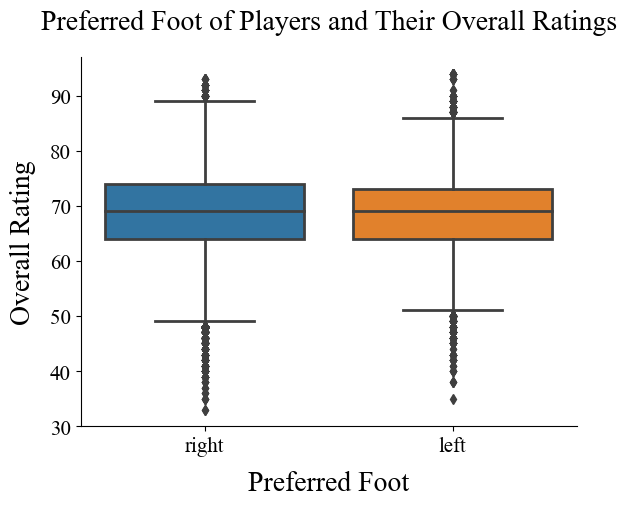

In [28]:
plt.rcParams.update(params)

sns.boxplot(x="PreferredFoot", y="OverallRating", data=players)

plt.xlabel("Preferred Foot")
plt.ylabel("Overall Rating")
plt.title("Preferred Foot of Players and Their Overall Ratings", fontsize=size)
sns.despine()

## Mean of Overall Ratings of Right-Footed and Left-Footed Players

In [39]:
players.groupby("PreferredFoot")["OverallRating"].mean()

PreferredFoot
left     68.652822
right    68.629651
Name: OverallRating, dtype: float64

### Section Summary
> * We see that being dominant in one foot or another does not have much bearing on the overall rating of a player. 
> * However, the left-footers have slightly better overall ratings. The reasons for that are not clear.

# Current and Potential Ratings of Players

The visualization below shows a comparison between the current and potential overall ratings of the players. 

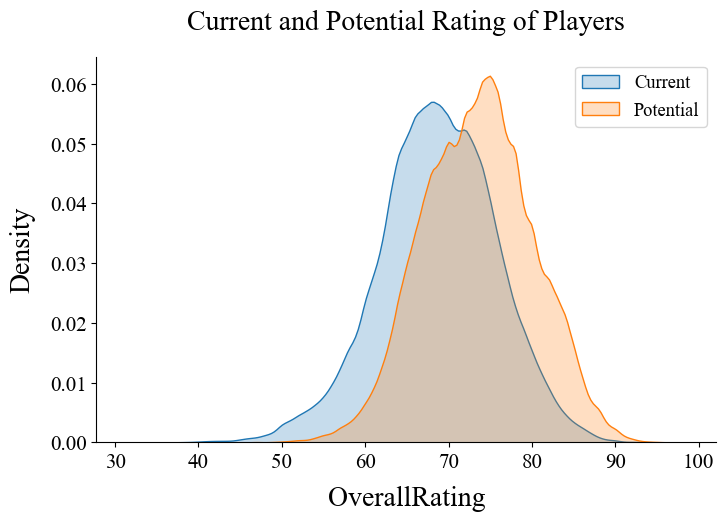

In [29]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=players["OverallRating"], fill=True, legend=True)
sns.kdeplot(data=players["Potential"], fill=True, legend=True)

ax.legend(["Current", "Potential"],fontsize=size/1.5)
ax.set_title("Current and Potential Rating of Players", fontsize=size)

sns.despine()

### Section Summary
> * The KDE (Kernel Density Estimation) plots above show the distribution of current and potential ratings of players.
> * The potential plot is shifted to the right, indicating that the players are given higher potential ratings than their current overall ratings.

# Attack and Defensive Ratings of Players

The visualization below shows the attack and defensive work rating of the players. Attack work rating is a measure of the level of participation of a player in attacking movements.  Defensive work rating is a measure of the level of participation of a player in defensive movements. 

In [30]:
players["AttackWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan

attack_values = players.groupby("AttackWorkRate")["PlayerID"].nunique()
attack_values = (
    attack_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
attack_values = attack_values.sort_values("Count", ascending=False)

In [31]:
players["DefenceWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[
    ~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"
] = np.nan

defence_values = players.groupby("DefenceWorkRate")["PlayerID"].nunique()
defence_values = (
    defence_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
defence_values = defence_values.sort_values("Count", ascending=False)

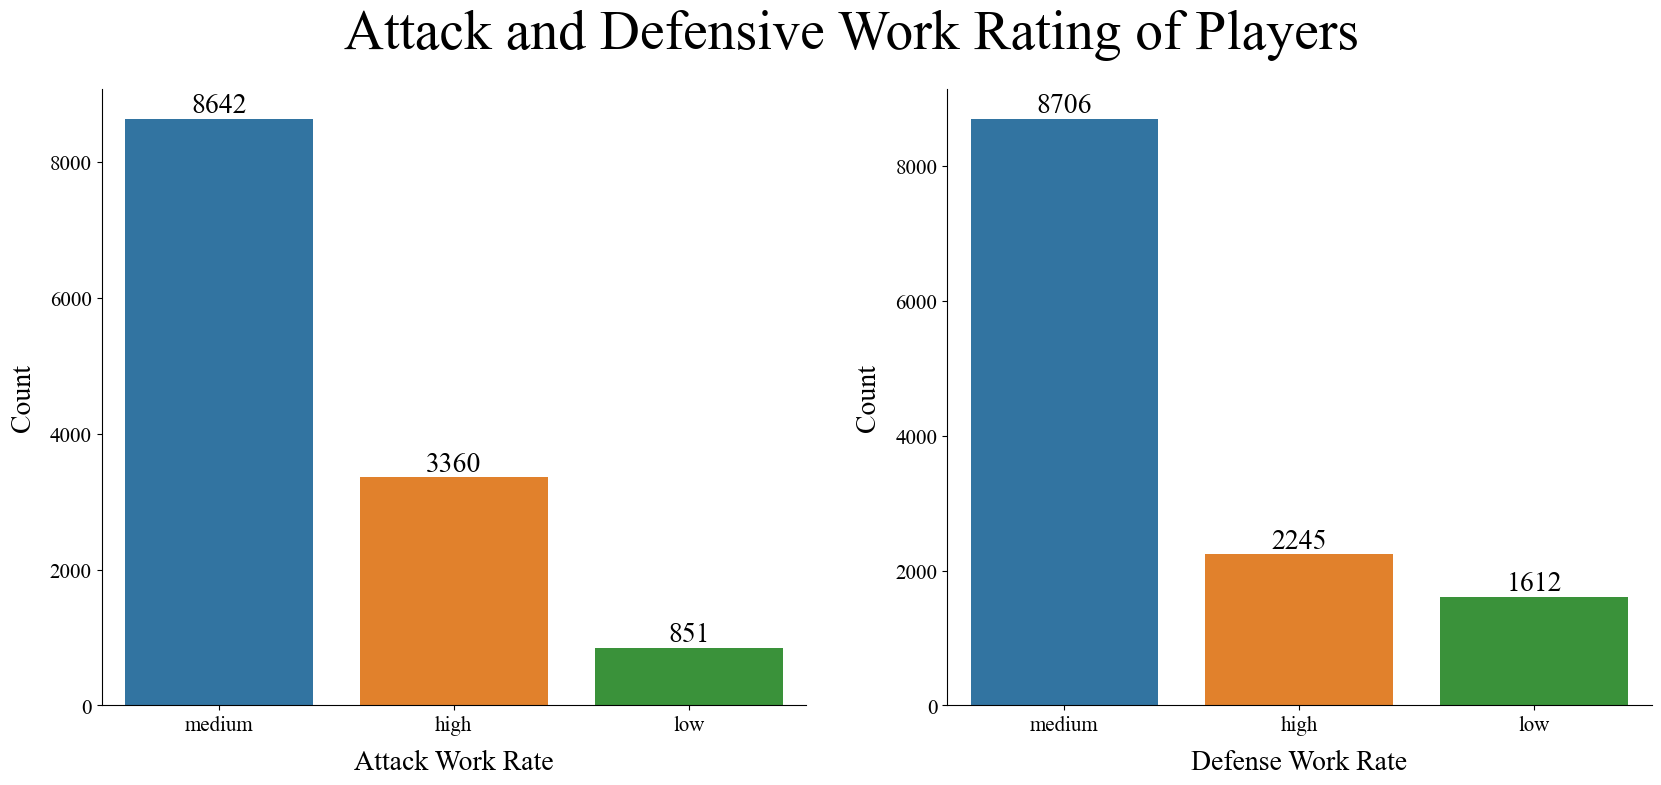

In [32]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.barplot(data=attack_values, x="AttackWorkRate", y="Count", ax=ax1)
ax2 = sns.barplot(data=defence_values, x="DefenceWorkRate", y="Count", ax=ax2)

ax1.set_xlabel("Attack Work Rate")
ax1.set_ylabel("Count")
ax1.bar_label(ax1.containers[0], size=size)

ax2.set_xlabel("Defense Work Rate")
ax2.set_ylabel("Count")
ax2.bar_label(ax2.containers[0], size=size)

plt.suptitle("Attack and Defensive Work Rating of Players", fontsize=size * 2)
sns.despine()

### Section Summary
> * Most players are rated at a medium level in both the Attack and Defensive Work Ratings.
> * Further analysis could indicate if the players who are rated at a certain category in the Attack Work Rate are usually rated in the same category in the Defensive Work Rate. 

# Number of Crossings at Matches Played and Home and Away from Home

Crossing is the quality and precision of a player to make a pass toward the center of the field, near the opponent's goal. The visualization below shows the number of crossings when teams played at home and away from home.

In [44]:
cross = matches[["HomeCross", "AwayCross"]]
cross = cross.sum(numeric_only=True)
cross = cross.to_frame().reset_index().rename(columns={"index": "Cross", 0: "Count"})

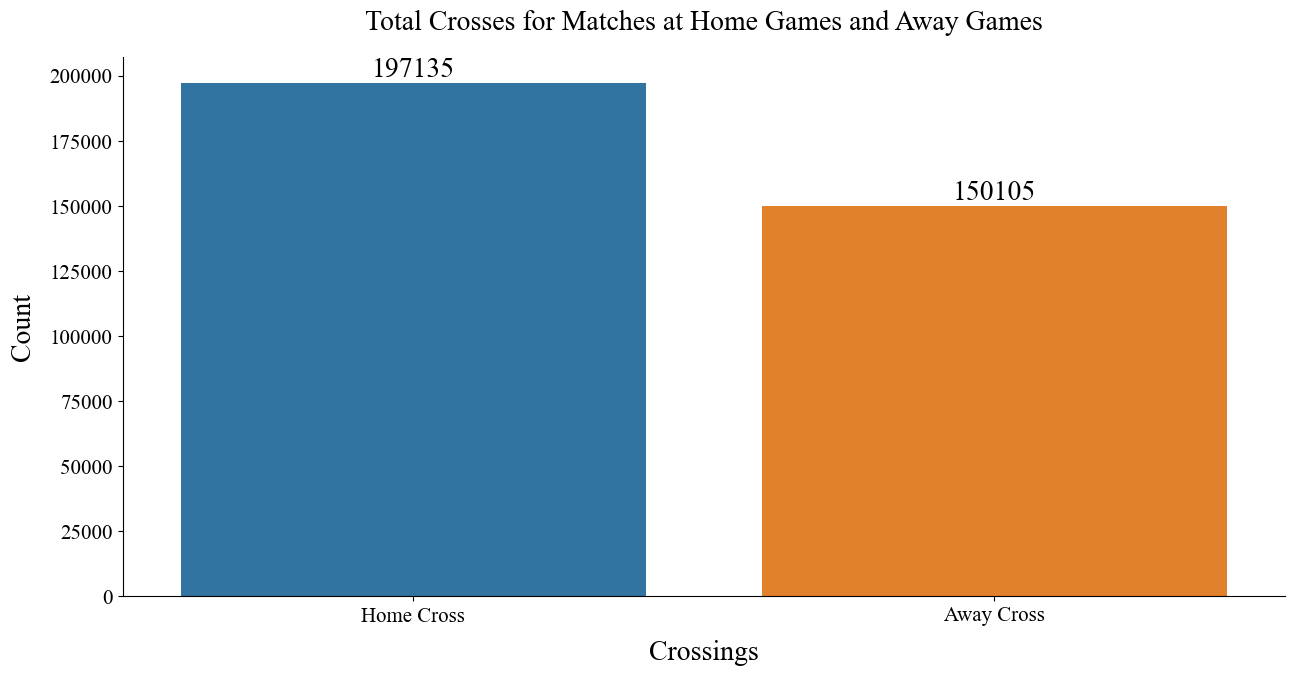

In [45]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Cross", y="Count", data=cross, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Cross", "Away Cross"])
chart.set_xlabel("Crossings")

plt.title("Total Crosses for Matches at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More crosses were made by players when they played at home than away from home. 
> * This is significant because good crosses are one of the ways of winnig a game.

# Hypothesis Test: Mean of Number of Crosses at Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of crosses for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of crosses for matches played at home are significantly different than those values for matches played away from home.

## Two-Sample T-Test

In [46]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)
    
    print("The p-value is: ", result.pvalue)
    
    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [47]:
home_cross = matches["HomeCross"]
away_cross = matches["AwayCross"]

## Numpy Variance Test

In [48]:
var_home_cross = np.var(home_cross)
var_away_cross = np.var(away_cross)

if var_home_cross == var_away_cross:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [49]:
two_sample_t_test(home_cross, away_cross, variance)

The variance of the samples are different.
The p-value is:  7.862658439298222e-210
Null hypothesis is rejected.


### Section Summary
> * To test this hypothesis, I conducted a two-sample t-test, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * The p-value obtained is almost zero, so it is much smaller than the significance level of 0.05. 
> * The NULL HYPOTHESIS was REJECTED, indicating that there is a statistically significant difference between the mean number of crosses made at home games and the mean number of crosses made at away games. 

# Number of Penalty Cards Received at Matches Played and Home and Away from Home

A penalty card is a tool used by referees to indicate that a player has committed a foul or broken a rule.

In [39]:
cards = matches[["HomeCard", "AwayCard"]]
cards = cards.sum(numeric_only=True)
cards = cards.to_frame().reset_index().rename(columns={"index": "Card", 0: "Count"})

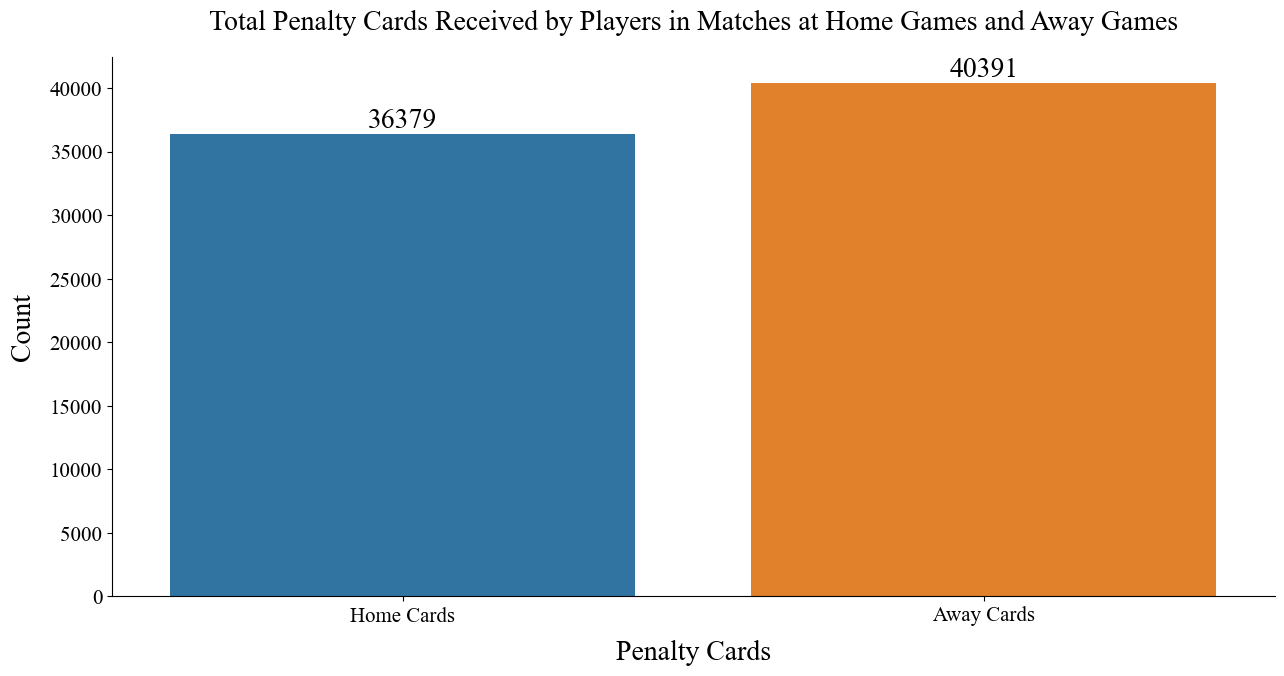

In [40]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Card", y="Count", data=cards, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Cards", "Away Cards"])
chart.set_xlabel("Penalty Cards")

plt.title("Total Penalty Cards Received by Players in Matches at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * Players of teams that played away from home received more penalty cards.
> * This is significant because receiving a card can mean a player cannot continue to play. Receiving a card also affects the team's morale.

# Hypothesis Test: Mean Number of Penalty Cards Received at Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of penalty cards received for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of penatly cards received for matches played at home are significantly different than the mean number of penalty cards received for matches played away from home. 

## Two-Sample T-Test

In [50]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)
    
    print("The p-value is: ", result.pvalue)
    
    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [51]:
home_card = matches["HomeCard"]
away_card = matches["AwayCard"]

## Numpy Variance Test

In [52]:
var_home_card = np.var(home_card)
var_away_card = np.var(away_card )

if var_home_cross == var_away_card:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [53]:
two_sample_t_test(home_card, away_card, variance)

The variance of the samples are different.
The p-value is:  3.121445604444814e-76
Null hypothesis is rejected.


### Section Summary
> * I conducted a two-sample t-test to test this hypothesis, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * The p-value obtained is almost zero, so it is much smaller than the significance level of 0.05. 
> * The NULL HYPOTHESIS was REJECTED, indicating that there is a statistically significant difference between the mean number of penalty cards received at home games and the mean number of penalty cards received at away games. 

# Build Up Playing Speed at Matches Played at Home and Away from Home

The build-up play speed refers to the pace at which a team progresses the ball from their own half towards the opposing team's half, while maintaining possession and advancing towards their opponent's goal.

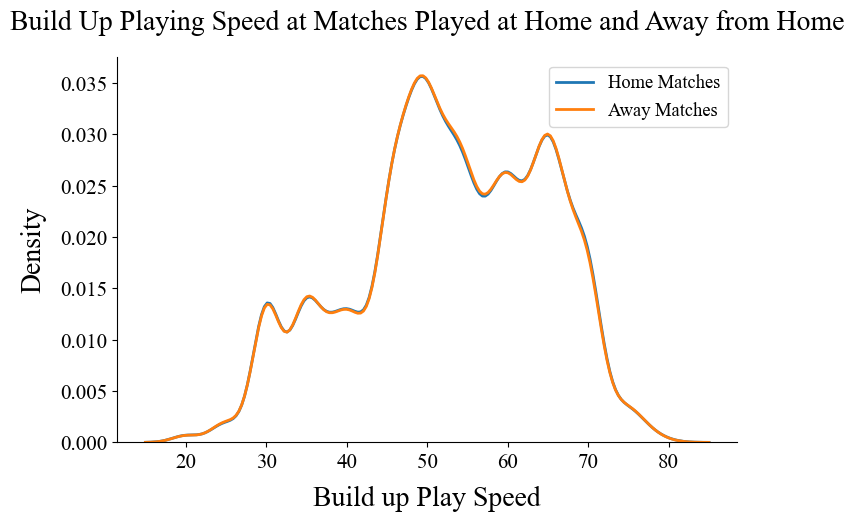

In [46]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=matches["HomeBuildUpPlaySpeed"], legend=True)
sns.kdeplot(data=matches["AwayBuildUpPlaySpeed"], legend=True)

ax.legend(["Home Matches", "Away Matches"],fontsize=size/1.5)
ax.set_xlabel("Build up Play Speed", fontsize=size)
ax.set_title("Build Up Playing Speed at Matches Played at Home and Away from Home", fontsize=size)

sns.despine()

### Section Summary
> * The data indicates that the buildup play speed is almost the same when teams played at home and away from home.
> * It may be that not much thought was given to collecting this part of the data, making this measure unreliable.

# Defensive Pressure at Matches Played at Home and Away from Home

Defensive pressure refers to the tactics used by a defending team to put pressure on the attacking team and disrupt their play.

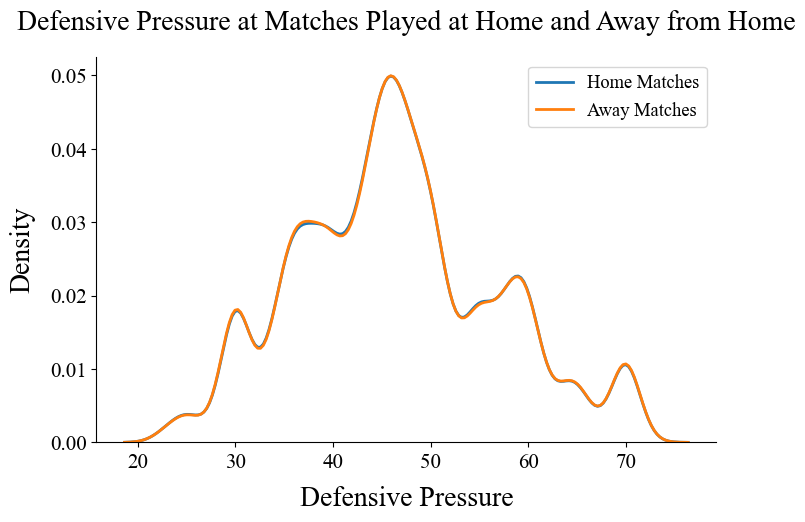

In [47]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=matches["HomeDefencePressure"], legend=True)
sns.kdeplot(data=matches["AwayDefencePressure"], legend=True)

ax.legend(["Home Matches", "Away Matches"],fontsize=size/1.5)
ax.set_xlabel("Defensive Pressure", fontsize=size)
ax.set_title("Defensive Pressure at Matches Played at Home and Away from Home", fontsize=size)

sns.despine()

### Section Summary
> * The data indicates that defensive pressure is almost the same when teams played at home and away from home.
> * It may be that not much thought was given to collecting this part of the data, making this measure unreliable.

# Machine Learning

In this section we will see several machine learning models that could possible be used to classify the outcome of the matches. 

## Data Preparation for Modeling

In [8]:
X = matches.loc[:, "HomePlayer1":"AwayDefenceTeamWidth"]
y = matches["Result"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=101
)

In [10]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

The section below shows a Logistic Regression model and its performance. 

In [11]:
lr = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)

In [12]:
lr.fit(scaled_X_train, y_train);

In [13]:
y_predict = lr.predict(scaled_X_test)

### Feature Weights

In [56]:
eli.show_weights(lr, feature_names=X.columns.tolist())

### Confusion Matrix

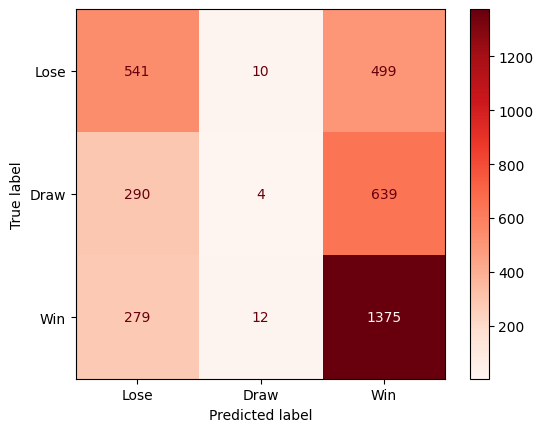

In [14]:
plot_confusion_matrix(lr,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 83%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws.      

## Logistic Regression with Elastic Net Regularization

The section below shows a Logistic Regression model with Elastic Net Regularization and its performance. 

In [16]:
en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    multi_class="ovr",
    max_iter=5000,
    l1_ratio=0.5,
    C=1,
)

In [17]:
en.fit(scaled_X_train, y_train);

In [18]:
y_predict = en.predict(scaled_X_test)

### Feature Weights

In [64]:
eli.show_weights(en, feature_names=X.columns.tolist())

### Confusion Matrix

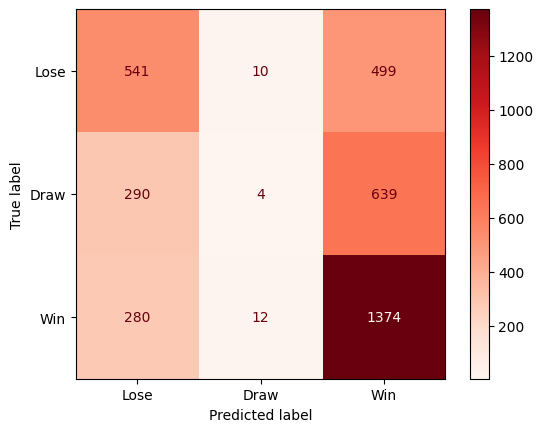

In [19]:
plot_confusion_matrix(en,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.82      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 82%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 

## Decision Tree

In [21]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(scaled_X_train, y_train)
y_predict = dtc.predict(scaled_X_test)

### Feature Weights

In [22]:
eli.show_weights(dtc, feature_names=X.columns.tolist())

Weight,Feature
0.3726,HomePlayer8
0.3140,AwayPlayer8
0.1354,HomePlayer7
0.0749,AwayPlayer6
0.0530,AwayPlayer4
0.0355,HomeCross
0.0146,AwayCross
0,AwayPlayer10
0,AwayPlayer9
0,AwayPlayer7


### Confusion Matrix

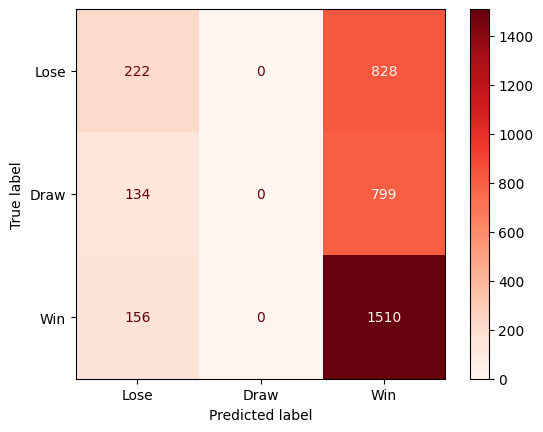

In [23]:
plot_confusion_matrix(dtc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.43      0.21      0.28      1050
           0       0.00      0.00      0.00       933
           1       0.48      0.91      0.63      1666

    accuracy                           0.47      3649
   macro avg       0.30      0.37      0.30      3649
weighted avg       0.34      0.47      0.37      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 91%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 

## Random Forest

The section below shows a Random Forest model and its performance. 

In [25]:
rfc = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [16]:
rfc.fit(scaled_X_train, y_train)
y_predict = rfc.predict(scaled_X_test)

### Feature Weights

In [17]:
eli.show_weights(rfc, feature_names=X.columns.tolist())

Weight,Feature
0.0312 ± 0.0140,HomePlayer8
0.0274 ± 0.0142,HomePlayer11
0.0269 ± 0.0145,AwayPlayer6
0.0264 ± 0.0116,AwayPlayer8
0.0257 ± 0.0085,AwayPlayer11
0.0255 ± 0.0135,HomePlayer9
0.0254 ± 0.0078,HomePlayer7
0.0253 ± 0.0054,AwayPlayer4
0.0249 ± 0.0102,HomePlayer10
0.0249 ± 0.0052,HomePlayer4


### Feature Importance

Below is a visualization showing the 50 most important features in this model in order of importance. 

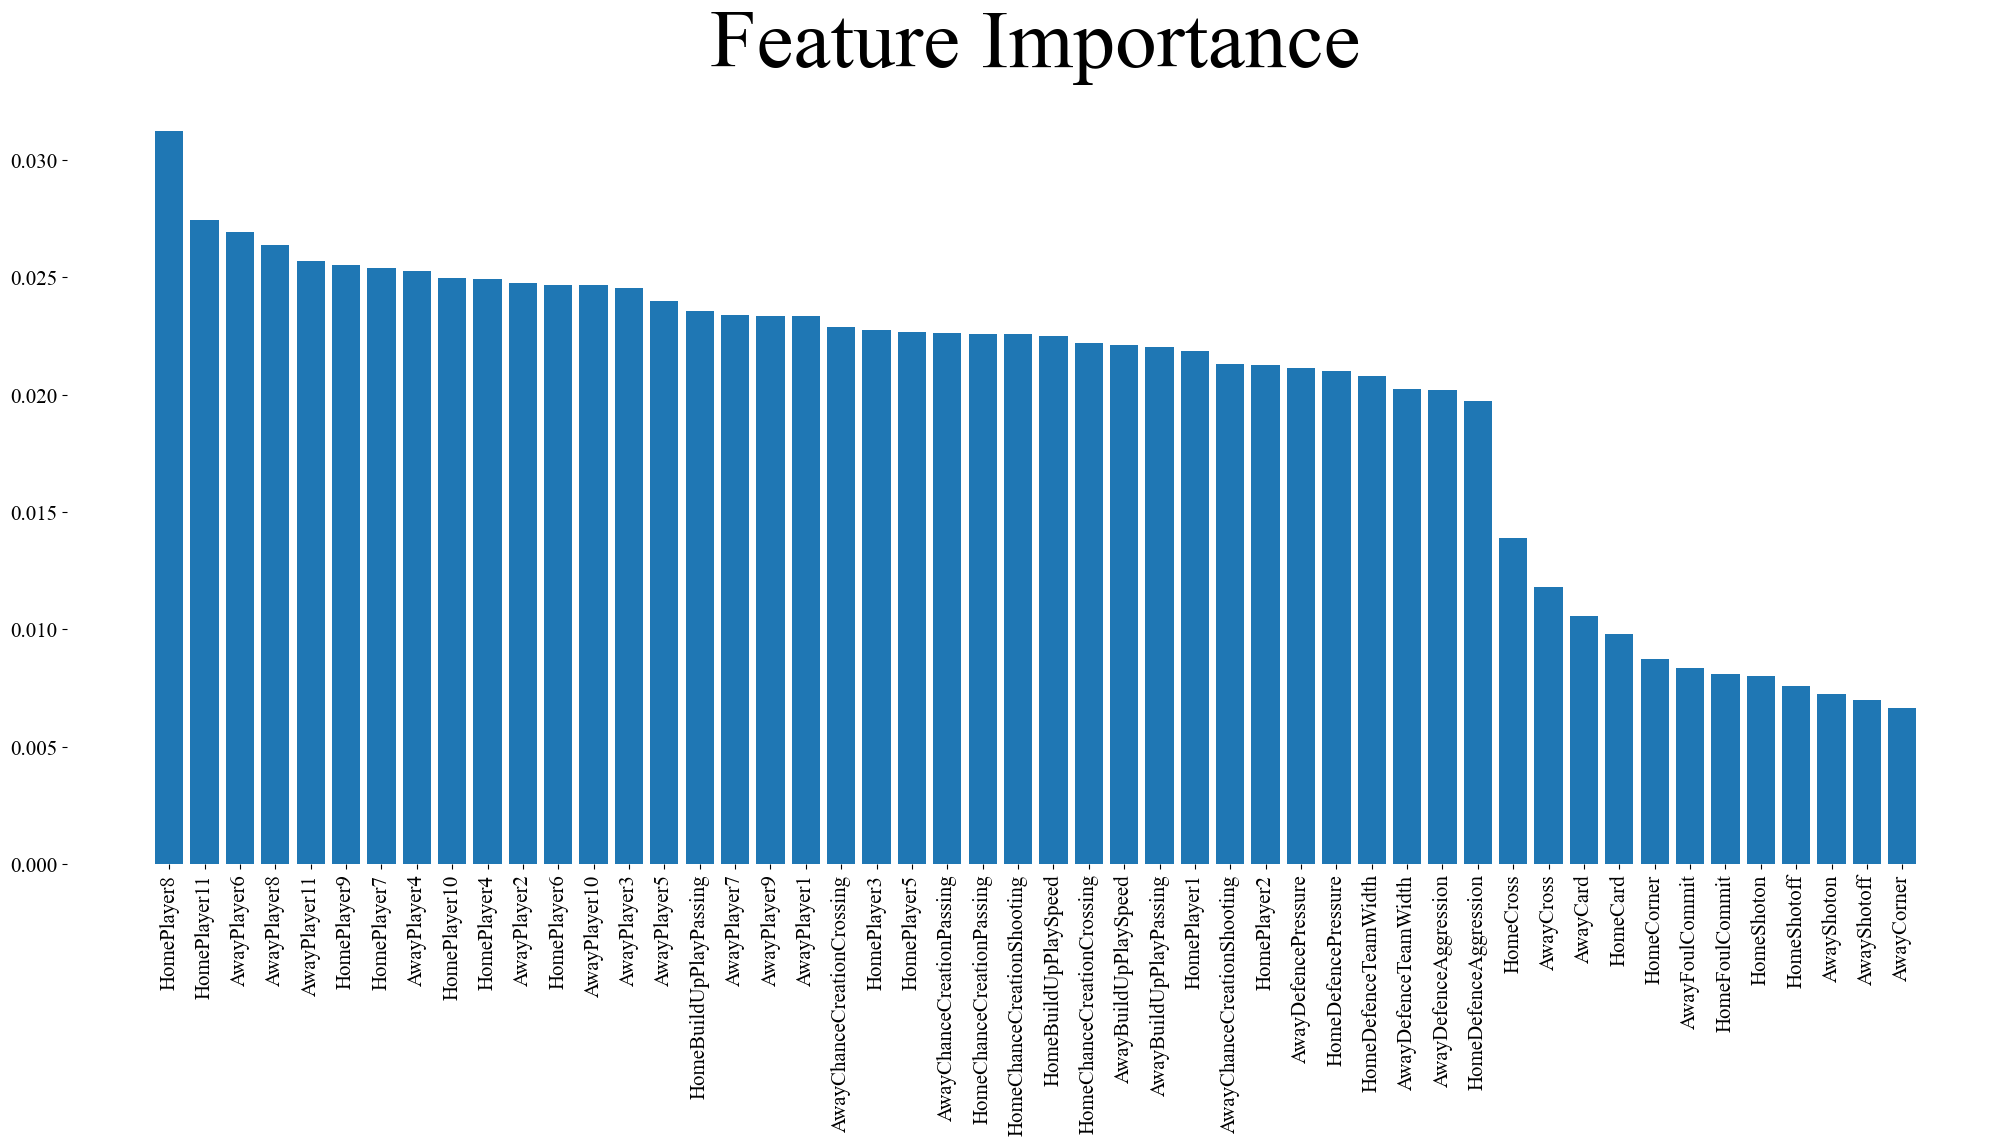

In [53]:
plt.rcParams.update(params)

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(25, 10))

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.title("Feature Importance", fontsize=size*3);

### Confusion Matrix

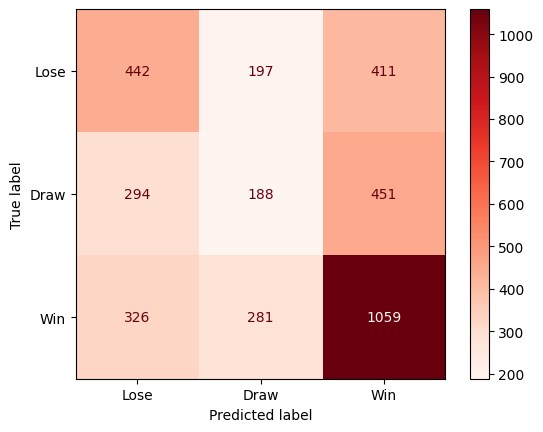

In [19]:
plot_confusion_matrix(rfc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.42      0.42      0.42      1050
           0       0.28      0.20      0.24       933
           1       0.55      0.64      0.59      1666

    accuracy                           0.46      3649
   macro avg       0.42      0.42      0.41      3649
weighted avg       0.44      0.46      0.45      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 64%. This model fails to meet my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 
> * The 50 most important features in this model in order of importance are identified. The top 15 features are players on either side. This is not comforting. First, players can change. One can get injured, for example. Second, players, being human have some level of unpredictability to them. For example, a major player could have a bad day for some reason, affecting the results of the match. 

## Random Forest with Grid Search

The section below shows a Random Forest model with Grid Search (for testing different hyperparameters) and its performance.

In [54]:
param_grid = {
    "n_estimators": [5, 15, 25],
    "max_features": [4, 14, 24],
    "oob_score": [True, False],
    "bootstrap": [True, False],
}

In [55]:
rfc = RandomForestClassifier(random_state=101)
grid = GridSearchCV(rfc, param_grid)

In [56]:
grid.fit(scaled_X_train, y_train);

In [85]:
grid.best_params_

{'bootstrap': True, 'max_features': 24, 'n_estimators': 25, 'oob_score': True}

In [57]:
rfcgs = RandomForestClassifier(
    bootstrap=True, max_features=24, n_estimators=25, oob_score=True
)

In [58]:
rfcgs.fit(scaled_X_train, y_train)
y_predict = rfcgs.predict(scaled_X_test)

### Feature Weights

In [88]:
eli.show_weights(rfcgs, feature_names=X.columns.tolist())

Weight,Feature
0.0306 ± 0.0109,HomePlayer8
0.0295 ± 0.0121,AwayPlayer8
0.0278 ± 0.0115,HomePlayer7
0.0276 ± 0.0093,HomePlayer11
0.0273 ± 0.0128,AwayPlayer6
0.0271 ± 0.0111,AwayPlayer9
0.0266 ± 0.0095,HomePlayer6
0.0262 ± 0.0058,AwayPlayer4
0.0258 ± 0.0094,AwayPlayer5
0.0255 ± 0.0120,HomePlayer9


### Feature Importance

Below is a visualization showing the 50 most important features in this model in order of importance. 

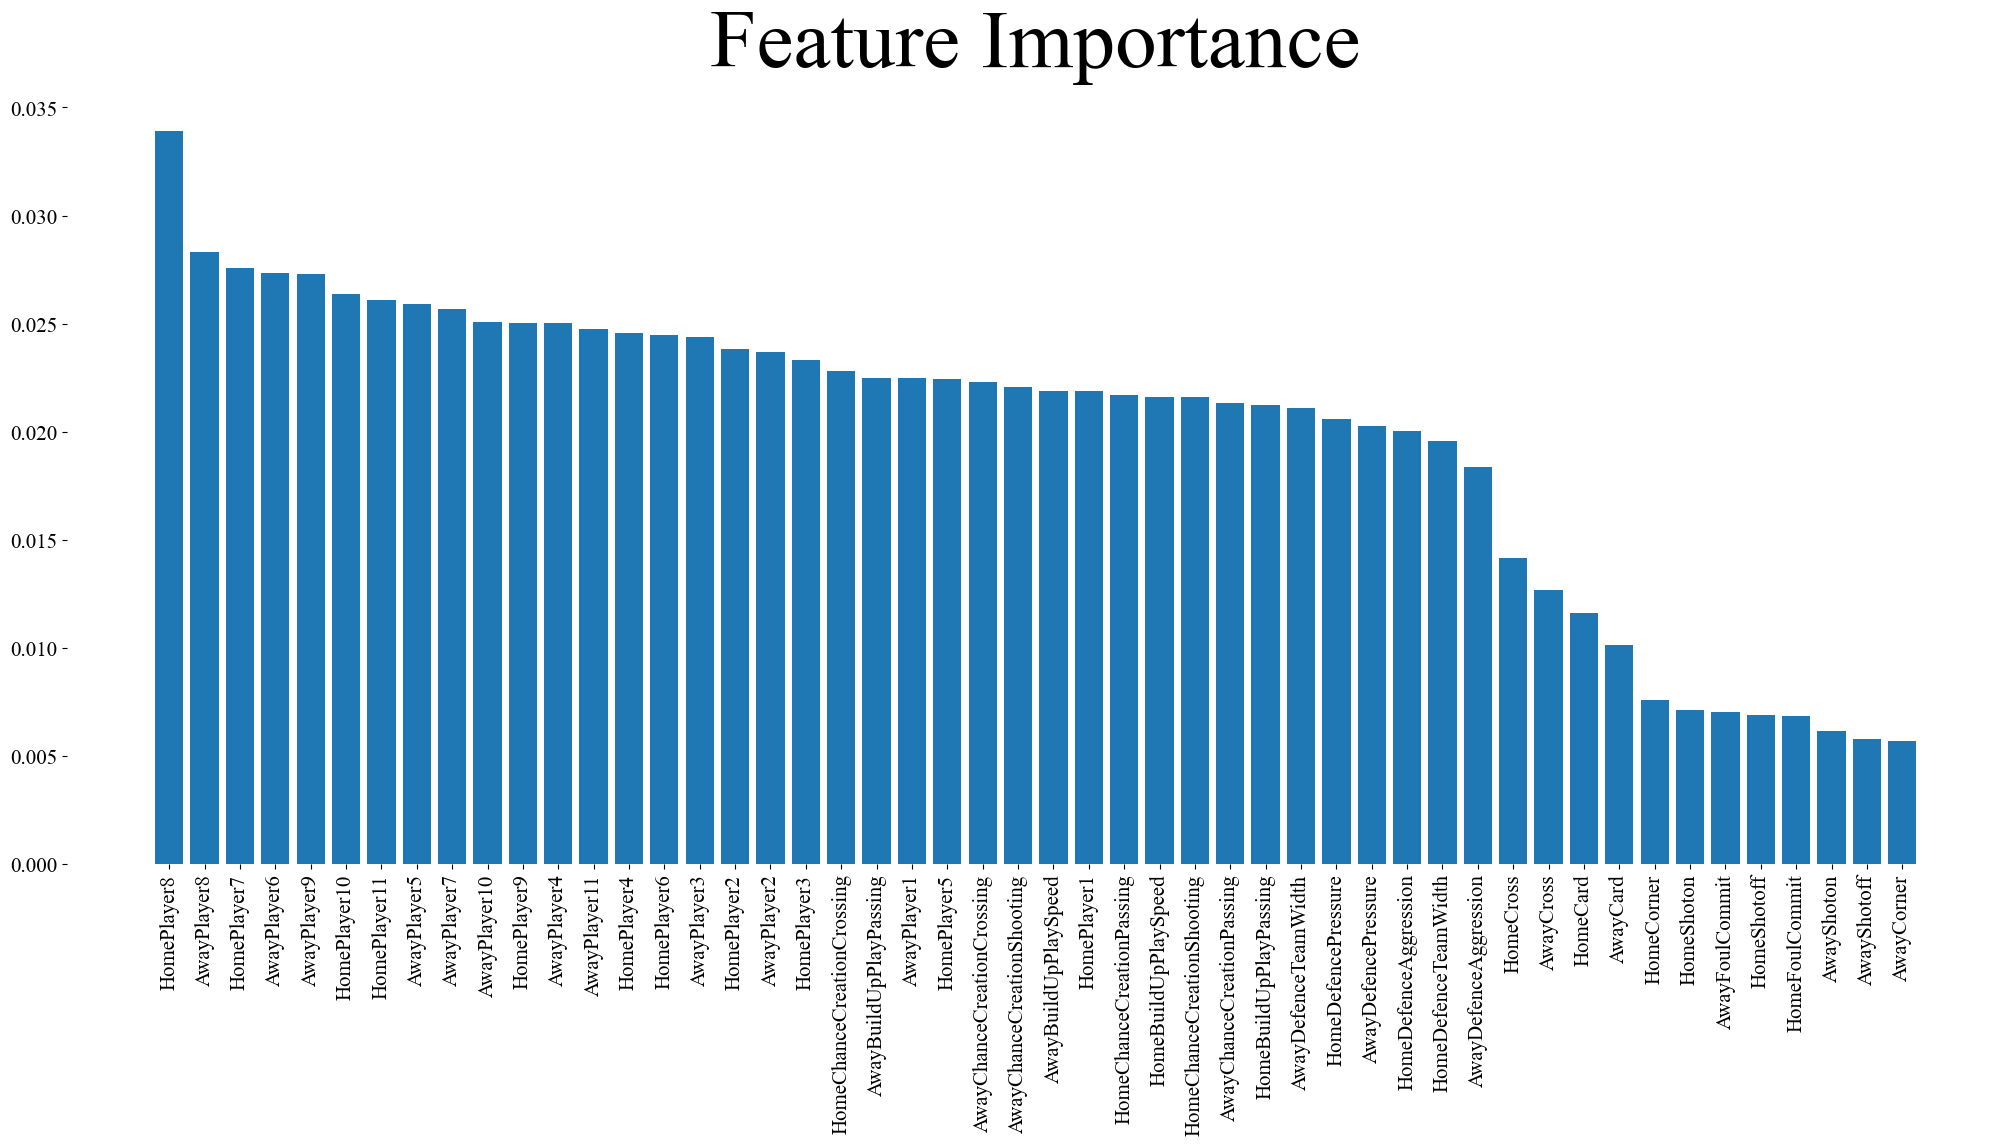

In [59]:
plt.rcParams.update(params)

importances = rfcgs.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(25, 10))

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.title("Feature Importance", fontsize=size*3);

### Confusion Matrix

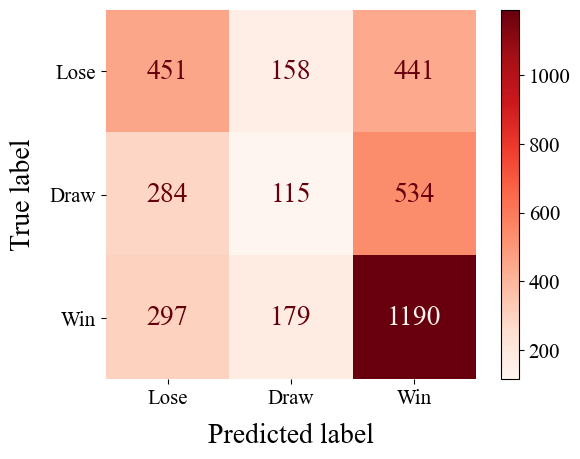

In [90]:
plot_confusion_matrix(rfcgs,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [89]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.44      0.43      0.43      1050
           0       0.25      0.12      0.17       933
           1       0.55      0.71      0.62      1666

    accuracy                           0.48      3649
   macro avg       0.41      0.42      0.41      3649
weighted avg       0.44      0.48      0.45      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 71%. This model does not meet my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 
> * The 50 most important features in this model in order of importance are identified. The top 19 features are players on either side. This is not comforting. First, players can change. One can get injured, for example. Second, players, being human have some level of unpredictability to them. For example, a major player could have a bad day for some reason, affecting the results of the match.

## Random Forest with Randomized Search Cross Validation

The section below shows a Random Forest model with Randomized Search Cross Validation (for testing different hyperparameters) and its performance.

In [12]:
param_dist = {
    'n_estimators': randint(10, 100),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    "bootstrap": [True, False],
}

In [13]:
rfc = RandomForestClassifier(random_state=101)

In [14]:
rscv = RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=1
)

In [15]:
rscv.fit(scaled_X_train, y_train);

In [16]:
print("Best hyperparameters: ", rscv.best_params_)

Best hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 97}


In [17]:
rfcrs = RandomForestClassifier(
    bootstrap=True,
    min_samples_split=6,
    n_estimators=97,
    min_samples_leaf=3,
    max_depth=8,
)

In [18]:
rfcrs.fit(scaled_X_train, y_train)
y_predict = rfcrs.predict(scaled_X_test)

### Feature Weights

In [19]:
eli.show_weights(rfcrs, feature_names=X.columns.tolist())

Weight,Feature
0.0515 ± 0.0858,HomePlayer8
0.0420 ± 0.0764,AwayPlayer3
0.0403 ± 0.0602,AwayPlayer8
0.0379 ± 0.0698,HomePlayer9
0.0368 ± 0.0620,HomePlayer3
0.0365 ± 0.0631,HomePlayer11
0.0348 ± 0.0650,HomePlayer7
0.0348 ± 0.0621,AwayPlayer7
0.0347 ± 0.0595,AwayPlayer10
0.0333 ± 0.0560,HomePlayer4


### Feature Importance

Below is a visualization showing the 50 most important features in this model in order of importance. 

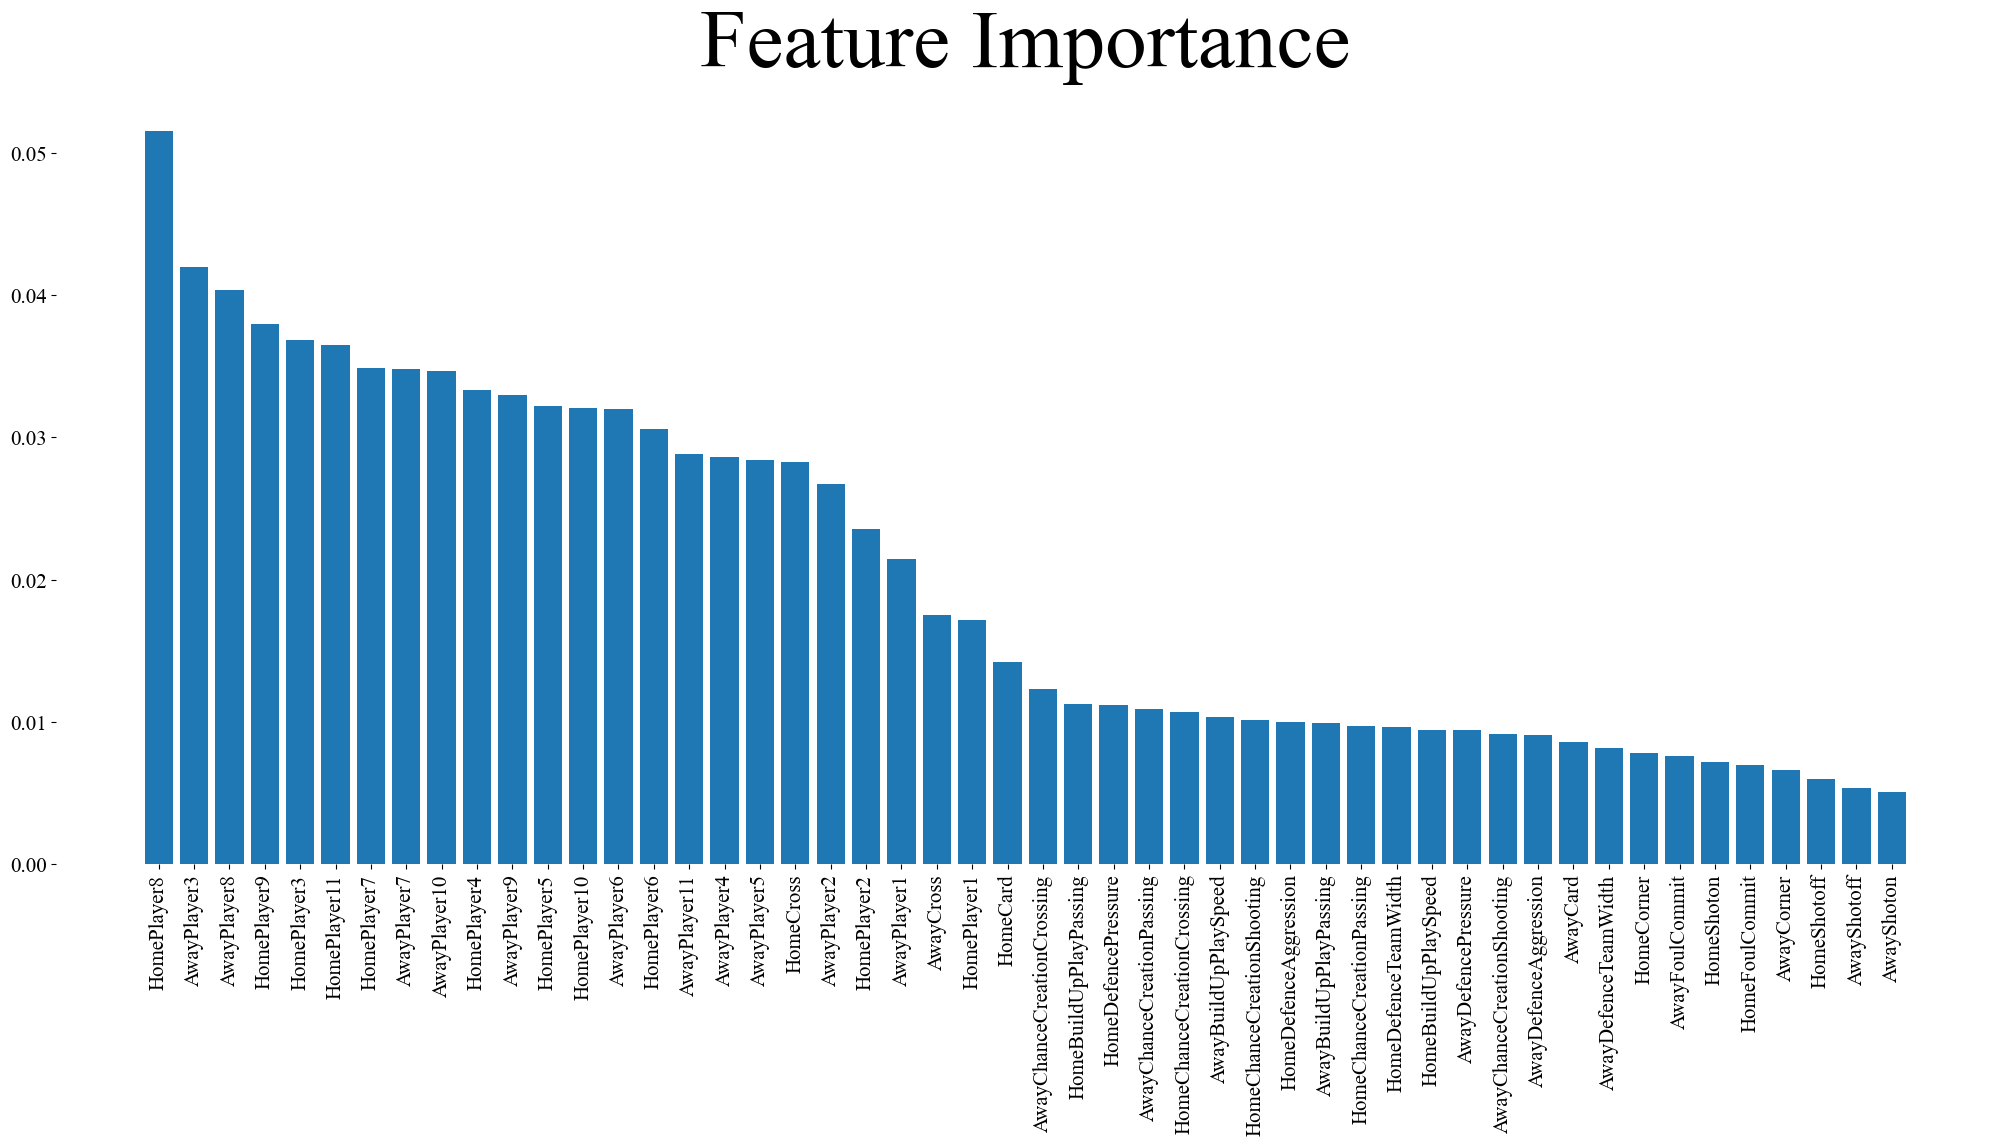

In [20]:
plt.rcParams.update(params)

importances = rfcrs.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(25, 10))

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.title("Feature Importance", fontsize=size*3);

### Confusion Matrix

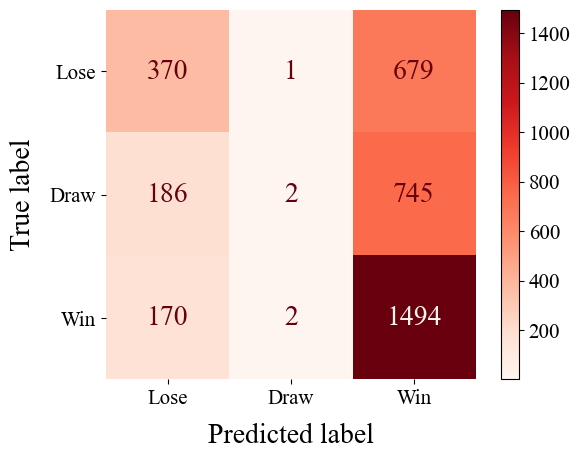

In [22]:
plot_confusion_matrix(rfcrs,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.51      0.35      0.42      1050
           0       0.40      0.00      0.00       933
           1       0.51      0.90      0.65      1666

    accuracy                           0.51      3649
   macro avg       0.47      0.42      0.36      3649
weighted avg       0.48      0.51      0.42      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 90%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 
> * The 50 most important features in this model in order of importance are identified. The top 14 features are players on either side. This is not comforting. First, players can change. One can get injured, for example. Second, players, being human have some level of unpredictability to them. For example, a major player could have a bad day for some reason, affecting the results of the match.

## Support Vector Classification (SVC)

The section below shows a Support Vector Classification (SVC) model and its performance.

In [105]:
svc = SVC(kernel="rbf", decision_function_shape="ovr")

In [106]:
svc.fit(scaled_X_train, y_train)
y_predict = svc.predict(scaled_X_test)

### Confusion Matrix

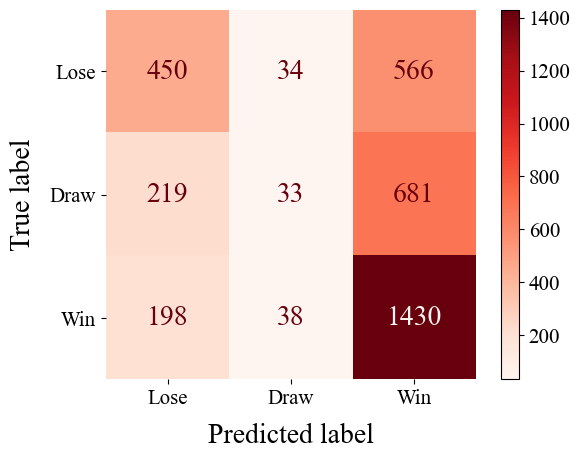

In [108]:
plot_confusion_matrix(svc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [107]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.52      0.43      0.47      1050
           0       0.31      0.04      0.06       933
           1       0.53      0.86      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.46      0.44      0.40      3649
weighted avg       0.47      0.52      0.45      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 86%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 

##  Principle Component Analysis (PCA)

The section below shows a Principle Component Analysis(PCA) with logistic regression and the performance of this model.

In [111]:
pipe = Pipeline(
    [("pca", PCA(n_components=18)), ("logistic", LogisticRegression(max_iter=10000))]
)

In [112]:
pipe.fit(scaled_X_train, y_train);

In [113]:
y_predict = pipe.predict(scaled_X_test)
score = pipe.score(X_test, y_test)

### Confusion Matrix

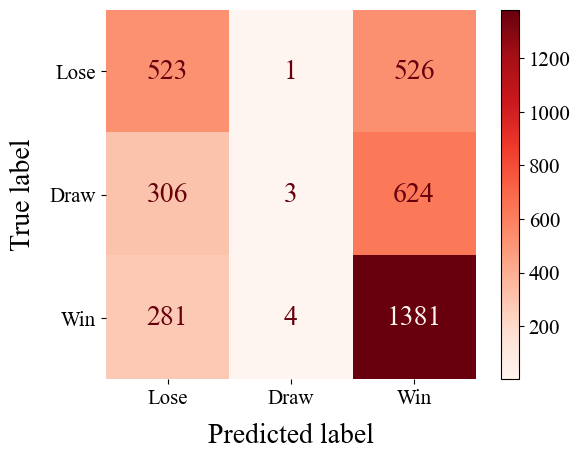

In [115]:
plot_confusion_matrix(pipe,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [114]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.47      0.50      0.48      1050
           0       0.38      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.46      0.44      0.38      3649
weighted avg       0.48      0.52      0.44      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 83%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws. 

##  ADA Boost (Adaptive Boosting) Classifier

The section below shows an ADA Boost Classifier and its performance.

In [65]:
adaboost = AdaBoostClassifier(random_state=101)

In [66]:
adaboost.fit(scaled_X_train, y_train)
y_predict = adaboost.predict(scaled_X_test)

### Feature Weights

In [72]:
eli.show_weights(adaboost, feature_names=X.columns.tolist())

Weight,Feature
0.0800 ± 0.5426,HomePlayer8
0.0600 ± 0.4750,AwayPlayer1
0.0600 ± 0.4750,HomePlayer3
0.0600 ± 0.4750,AwayCross
0.0600 ± 0.4750,AwayPlayer9
0.0600 ± 0.4750,AwayPlayer8
0.0600 ± 0.4750,HomeCross
0.0400 ± 0.3919,HomePlayer4
0.0400 ± 0.3919,AwayPlayer6
0.0400 ± 0.3919,HomePlayer5


### Confusion Matrix

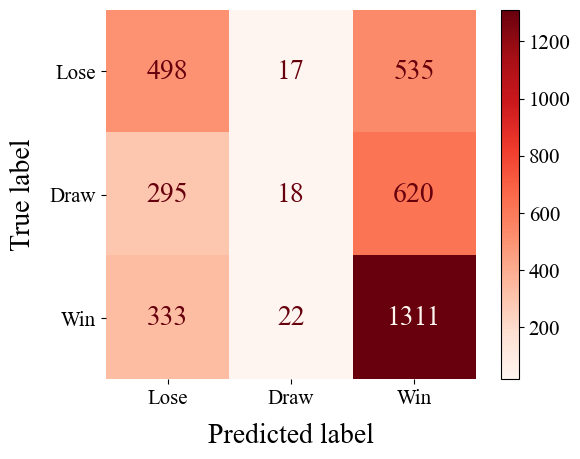

In [69]:
plot_confusion_matrix(adaboost,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### Classification Report

In [67]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.44      0.47      0.46      1050
           0       0.32      0.02      0.04       933
           1       0.53      0.79      0.63      1666

    accuracy                           0.50      3649
   macro avg       0.43      0.43      0.38      3649
weighted avg       0.45      0.50      0.43      3649



### Section Summary
> * According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. <BR>
> * Our Recall Score for wins for this model is 79%. This model exceeds my standard for Recall Scores for wins, making it an acceptable model. 
> * The other scores indicate that this model is poor at capturing losses or draws.  

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 200,000 data points related to European football games. <br> 
>* **The Goal of the Project:** The major goal of this project was to find a model that could classify the outcome of a match with an adequate level of certainty.
>* **Models:**I utilized the 9 models. According to Standard 6, I decided to create a model that captures as many wins as possible. I was not interested in capturing losses or draws. So, the Recall Score for wins in each model is of ultimate interest to me. My standard for an acceptable Recall Score for wins is 75%. 
>* **Recall Scores for Wins:** All models, except for Random Forest exceeded my standards. 
>* **Performance of ML Models:** The other scores indicate that this model is poor at capturing losses or draws.  
>* **Feature Engineering and Hyperparameter Testing:** I tried feature engineering and hyperparameter testing with techniques such as PCA or Grid Search. PCA showed similar results as the other models. Random Forest with Grid Search improved the Recall Score for wins over the Random Forest model without Grid Search. 
>* **Amount and Quality of Data:** In many cases with ML, having better and more data is MUCH more important than the model used. I tried my best with the data I had and tried to use different models. My results did not improve.
>* **Stochastic System:** A football match is a stochastic system. Two matches even with the same seemingly initial conditions like the players, place or weather can have varying results. This makes classifying the result of a football match extremely difficult. Human behavior is hard to classify. It cannot be easily capsulized in numbers. This is one of the reasons, it would be hard to classify the outcome of a game. For example, an important player could have fought with his wife or been involved in a traffic accident on the day of the game. This could have affected his performance and the outcome of the game, and this is not something that can be measured by the statistical information given in this dataset. Similarly, a low-performing player could have performed exceptionally well in a particular match, creating a win for his team that was unexpected. 
>* **Simple Guesses:** From some of the measures, like the number of goals, crossings and penalties, teams usually did better when they played at home than when they played away from home. Without any other data to rely on, a safe "guess" may be to pick the winner of a match simply based on if a team is playing at home or away from home.
>* **Business Recommendation:** I recommend moving with caution if one decides to create a business based on betting on such matches.

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Domain Knowledge:** It is best if the data scientist, has adequate domain knowledge on the topic of the analysis. I do not have any expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. For example, I only became aware after I finished the project that for the most part, teams in a league play among themselves. I would have grouped the data better had I known this fact earlier.<br>
>* **Hold-Out Set:** In my future projects, I will divide my dataset in three ways, to have a holdout set. I learned about this technique only after I had completed the project.
>* **Better Data on Players:** Clear information about players in each team is not part of this data set. For example, it was not clear which players were playing at which parts of the game. This would be one of the major areas of improvement. <br>
>* **Better Data on Teams:** Some of the information on teams seemed unreliable. For example the data on teams when they played at home and when they played away from home, like defensive pressure attribute, was almost identical. Better data collection practices could improve the quality of the data.   
>* **Statistics:** I will continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>